<a href="https://colab.research.google.com/github/katelyn-michelle-2023/2026/blob/main/cs101_data_vis_katelyn_tasnia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import pandas as pd
#import numpy as np

#csv_path = "/content/NYC_Building_Energy_and_Water_Data_Disclosure_for_Local_Law_84_2023_to_Present_.csv"
#df = pd.read_csv(csv_path)
#df

In [ ]:
import pandas as pd
import numpy as np

csv_path = "/content/NYC_Building_Energy_and_Water_Data_Disclosure_for_Local_Law_84_2023_to_Present_(Data_for_Calendar_Year_2022-Present)_20251209.csv"
df = pd.read_csv(csv_path)
df

/tmp/ipython-input-3602572361.py:5: DtypeWarning: Columns (10,16,32,34,42,61,76,77,78,79,80,81,82,91,174,239,240,241,242,243,244,245,246,247,248,249,250,257) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


,Calendar Year,Property ID,Property Name,Parent Property ID,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,...,Aggregate Meter(s)-District Steam – Number of Individual Meters Included,Report Generation Date,Report Submission Date,Borough,Latitude,Longitude,Community Board,Council District,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
0,2022,6414946,58-01 Grand Avenue,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,4026780001,4059918,58-01 Grand Avenue,Queens,...,NaN,04/25/2023 11:01:00 AM,04/25/2023 11:02:00 AM,QUEENS,40.719667,-73.911197,405.0,30.0,531.0,QN0501
1,2022,9793770,1870 Pelham Parkway South,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,2042500026,2047795,1870 Pelham Parkway South,Bronx,...,NaN,03/11/2023 02:00:00 PM,03/11/2023 02:01:00 PM,BRONX,40.855488,-73.830726,210.0,13.0,300.0,BX1003
2,2022,10177418,Central Building,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,4157040040,4300145,2011 Mott Ave,Far Rockaway,...,NaN,04/14/2023 03:47:00 PM,04/14/2023 03:47:00 PM,QUEENS,40.604320,-73.753009,414.0,31.0,100803.0,QN1401
3,2022,13511507,215 East 99th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,1016490009,1052383,215 East 99th Street,New York,...,NaN,03/12/2023 03:54:00 PM,03/12/2023 03:54:00 PM,MANHATTAN,40.786963,-73.947537,111.0,8.0,164.0,MN1101
4,2022,14009907,23-25 31 Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,4008350027,4017180,23-25 31 Street,Queens,...,NaN,04/28/2023 02:22:00 PM,04/28/2023 02:23:00 PM,QUEENS,40.773768,-73.913573,401.0,22.0,115.0,QN0101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103254,2024,66131792,378 Flushing Avenue,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2024,3018840048,3054204,378 Flushing Avenue,Brooklyn,...,0.0,08/30/2025 12:00:00 AM,NaN,BROOKLYN,40.698568,-73.959497,303.0,33.0,1237.0,BK0301
103255,2024,66133394,1003 EAST 173 STREET,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2024,2030090025,2010928,EAST 173 STREET,Bronx,...,0.0,08/30/2025 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103256,2024,66133492,33 Little Nassau Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2024,3018840040,3054203,33 Little Nassau Street,Brooklyn,...,0.0,08/30/2025 12:00:00 AM,NaN,BROOKLYN,40.697914,-73.959530,303.0,33.0,1237.0,BK0301
103257,2024,66134892,3162 VILLA AVE.,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2024,2033110029,2017331;2129648,VILLA AVE.,Bronx,...,0.0,08/30/2025 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 1st subset of columns to work with -> Q1 Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)

#selects 3 columns ('Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)',
#'Longitude', 'Latitude') -> removes any rows where its NAN
df_q2 = df[['Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)',
            'Longitude', 'Latitude']].dropna()

#converts GHG intensity to numbers
df_q2['Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)'] = \
    pd.to_numeric(df_q2['Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)'],
                  errors='coerce')

df_q2 = df_q2.dropna()

df_q2



,Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²),Longitude,Latitude
0,0.60,-73.911197,40.719667
1,4.10,-73.830726,40.855488
2,4.60,-73.753009,40.604320
3,4.30,-73.947537,40.786963
4,4.30,-73.913573,40.773768
...,...,...,...
103249,3.96,-73.914368,40.818601
103250,44.30,-73.953272,40.694223
103252,10.20,-73.932210,40.723881
103254,5.56,-73.959497,40.698568


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# nice default style
sns.set_theme(style="darkgrid")

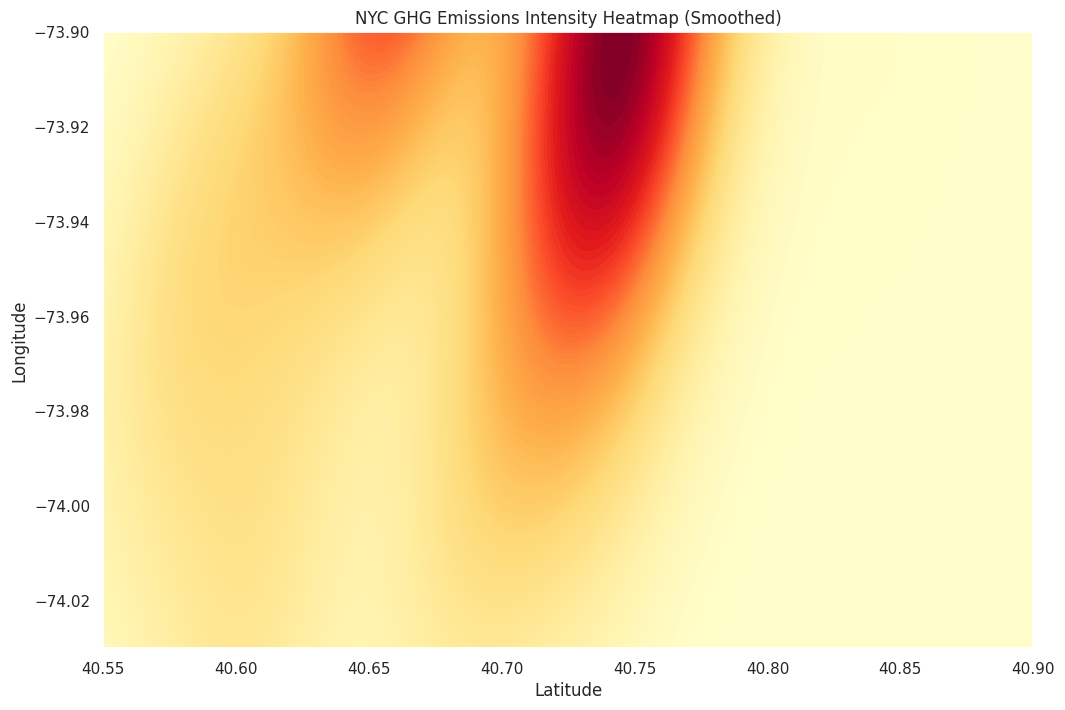

In [ ]:
# positive GHG intensity
df_pos = df_q2[df_q2['Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)'] > 0]

plt.figure(figsize=(12,8))

sns.kdeplot(
    x=df_pos['Latitude'],
    y=df_pos['Longitude'],
    weights=df_pos['Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)'],
    cmap="YlOrRd",
    fill=True,
    thresh=0,
    levels=100
)

plt.title("NYC GHG Emissions Intensity Heatmap (Smoothed)")
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.ylim(-74.03, -73.90)
plt.xlim(40.55, 40.9)
plt.show()



In [ ]:
# list all columns
print(df.columns)

# check if specific columns exist (for 2nd Q - How do ENERGY STAR Scores differ across major building types?)
columns_to_check = [
    "Primary Property Type - Self Selected",
    "Primary Property Type - Portfolio Manager-Calculated",
    "ENERGY STAR Score"
]

for col in columns_to_check:
    if col in df.columns:
        print(f"Column exists: {col}")
    else:
        print(f"Column NOT found: {col}")


Index(['Calendar Year', 'Property ID', 'Property Name', 'Parent Property ID',
       'Parent Property Name', 'Year Ending',
       'NYC Borough, Block and Lot (BBL)',
       'NYC Building Identification Number (BIN)', 'Address 1', 'City',
       ...
       'Aggregate Meter(s)-District Steam – Number of Individual Meters Included',
       'Report Generation Date', 'Report Submission Date', 'Borough',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract (2020)', 'Neighborhood Tabulation Area (NTA) (2020)'],
      dtype='object', length=265)
Column exists: Primary Property Type - Self Selected
Column exists: Primary Property Type - Portfolio Manager-Calculated
Column exists: ENERGY STAR Score


In [ ]:
#cleans ENERGY STAR Score & Primary Property Type


df_energy = df[['Primary Property Type - Portfolio Manager-Calculated', 'ENERGY STAR Score']].dropna()
df_energy['ENERGY STAR Score'] = pd.to_numeric(df_energy['ENERGY STAR Score'], errors='coerce')
df_energy = df_energy.dropna()
print(df_energy['Primary Property Type - Portfolio Manager-Calculated'].nunique())
print(df_energy['Primary Property Type - Portfolio Manager-Calculated'].value_counts())
print(df_energy['Primary Property Type - Portfolio Manager-Calculated'].value_counts().get("Vehicle Dealership", 0))


df_energy

23
Primary Property Type - Portfolio Manager-Calculated
Multifamily Housing                      54864
Office                                    6170
K-12 School                               5402
Hotel                                     1840
Non-Refrigerated Warehouse                1128
Retail Store                               616
Worship Facility                           503
Residence Hall/Dormitory                   498
Senior Living Community                    485
Distribution Center                        467
Medical Office                             327
Hospital (General Medical & Surgical)      294
Supermarket/Grocery Store                  252
Refrigerated Warehouse                     109
Financial Office                            97
Mixed Use Property                          85
Courthouse                                  74
Vehicle Dealership                          47
Wastewater Treatment Plant                  42
Wholesale Club/Supercenter                  40
Bank

,Primary Property Type - Portfolio Manager-Calculated,ENERGY STAR Score
0,Non-Refrigerated Warehouse,96.0
1,Multifamily Housing,61.0
3,Multifamily Housing,64.0
4,Medical Office,98.0
5,Multifamily Housing,61.0
...,...,...
103246,Office,74.0
103249,Multifamily Housing,98.0
103252,Refrigerated Warehouse,22.0
103254,Office,90.0


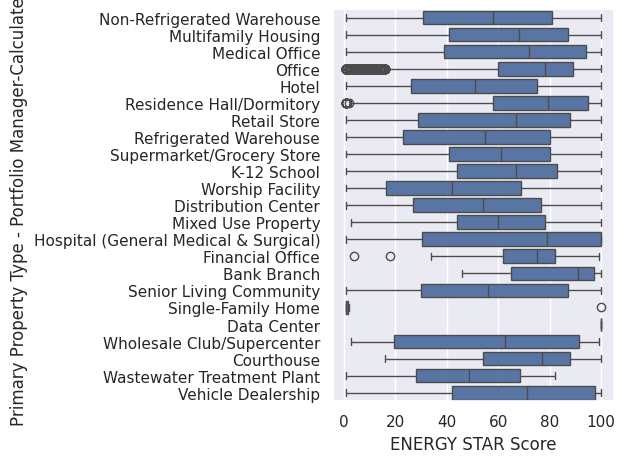

In [ ]:
#boxplot
sns.boxplot(
    x="ENERGY STAR Score",
    y="Primary Property Type - Portfolio Manager-Calculated",
    data=df_energy
)
plt.tight_layout()
plt.show()

In [ ]:
#Q3 Year-to-year trends → how did energy use change over time?

df_year_compare = df[['Calendar Year', 'Site EUI (kBtu/ft²)', 'Property GFA - Self-Reported (ft²)']].copy()

#cleans calendar year
df_year_compare['Calendar Year'] = pd.to_numeric(df_year_compare['Calendar Year'], errors='coerce')
df_year_compare = df_year_compare[df_year_compare['Calendar Year'].between(2011,2025)]

#adds values to Site EUI where it's Not Available -> uses median num
df['Site EUI (kBtu/ft²)'] = pd.to_numeric(df['Site EUI (kBtu/ft²)'], errors='coerce') # changes Not Available to NAN
median_eui = df['Site EUI (kBtu/ft²)'].median()
df['Site EUI (kBtu/ft²)'] = df['Site EUI (kBtu/ft²)'].fillna(median_eui)  #fills NAN with calculated median
df['Site EUI (kBtu/ft²)'] = pd.to_numeric(df['Site EUI (kBtu/ft²)'], errors='coerce').round().astype('int64') #turns site eui to all integers


df_year_compare = df_year_compare.dropna()
df_year_compare
print(df_year_compare.dtypes)




Calendar Year                          int64
Site EUI (kBtu/ft²)                   object
Property GFA - Self-Reported (ft²)    object
dtype: object


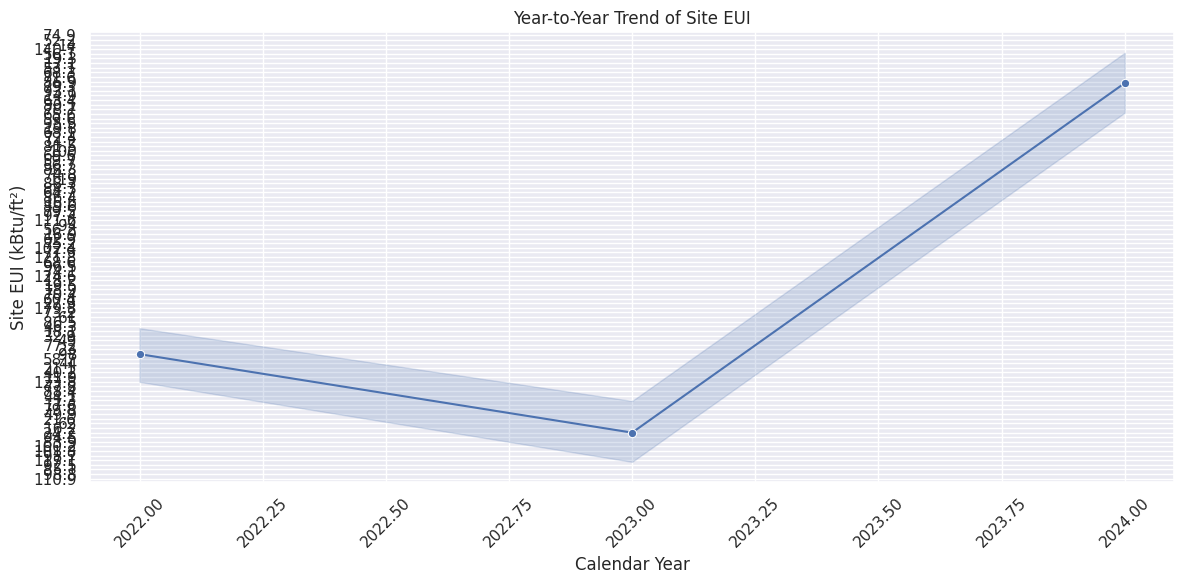

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

plt.figure(figsize=(12,6))

sns.lineplot(
    data=df_year_compare,
    x="Calendar Year",
    y="Site EUI (kBtu/ft²)",
    marker="o"
)

plt.title("Year-to-Year Trend of Site EUI")
plt.xlabel("Calendar Year")
plt.ylabel("Site EUI (kBtu/ft²)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
